In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy
from scipy.stats import norm

In [82]:
data = pd.read_csv("abalonedata.csv")
col = ["L","D","H","WW","SW","VW","LW"]
data

,R,S,L,D,H,WW,SW,VW,LW
0,15,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,7,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,9,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,10,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,7,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...,...
4172,11,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,10,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,9,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,10,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


**Small-data dataset**

In [83]:
data_S = copy.deepcopy(data.loc[(data.R <= 5) & (data.R >= 1)])
data_S

,R,S,L,D,H,WW,SW,VW,LW
42,5,I,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.0200
43,5,I,0.205,0.150,0.055,0.0420,0.0255,0.0150,0.0120
44,4,I,0.210,0.150,0.050,0.0420,0.0175,0.0125,0.0150
58,4,I,0.245,0.190,0.060,0.0860,0.0420,0.0140,0.0250
125,5,I,0.270,0.195,0.060,0.0730,0.0285,0.0235,0.0300
...,...,...,...,...,...,...,...,...,...
3963,4,I,0.270,0.205,0.075,0.1180,0.0590,0.0310,0.0305
3964,5,I,0.270,0.190,0.060,0.0990,0.0445,0.0170,0.0300
3994,4,I,0.185,0.135,0.045,0.0320,0.0110,0.0065,0.0100
3995,5,I,0.245,0.175,0.055,0.0785,0.0400,0.0180,0.0200


In [86]:
tmp = data_S[col].describe().loc[["mean","std"]]
tmp

,L,D,H,WW,SW,VW,LW
mean,0.255820,0.187963,0.062302,0.096683,0.045958,0.021058,0.028545
std,0.068613,0.052799,0.019796,0.072998,0.055320,0.016036,0.020270


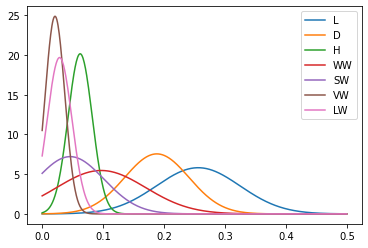

In [87]:
x = np.arange(0.0, 0.5, 0.001)

plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'L'), tmp._get_value("std", 'L')), label='L')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'D'), tmp._get_value("std", 'D')), label='D')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'H'), tmp._get_value("std", 'H')), label='H')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'WW'), tmp._get_value("std", 'WW')), label='WW')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'SW'), tmp._get_value("std", 'SW')), label='SW')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'VW'), tmp._get_value("std", 'VW')), label='VW')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'LW'), tmp._get_value("std", 'LW')), label='LW')


plt.legend()

The most differentiable attributes are: VW, H and  

In [88]:
data_S[col].corr()

,L,D,H,WW,SW,VW,LW
L,1.000000,0.976550,0.852423,0.928089,0.600235,0.881295,0.935311
D,0.976550,1.000000,0.833777,0.913866,0.590875,0.865123,0.920756
H,0.852423,0.833777,1.000000,0.823764,0.525951,0.796471,0.833174
WW,0.928089,0.913866,0.823764,1.000000,0.619960,0.955098,0.981555
SW,0.600235,0.590875,0.525951,0.619960,1.000000,0.555413,0.618641
VW,0.881295,0.865123,0.796471,0.955098,0.555413,1.000000,0.935846
LW,0.935311,0.920756,0.833174,0.981555,0.618641,0.935846,1.000000


In [89]:
data_S[col].corr().describe().loc[["min"]]

,L,D,H,WW,SW,VW,LW
min,0.600235,0.590875,0.525951,0.61996,0.525951,0.555413,0.618641


**Mid-data dataset**

In [90]:
data_M = copy.deepcopy(data.loc[(data.R <= 10) & (data.R >= 6)])
data_M

,R,S,L,D,H,WW,SW,VW,LW
1,7,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,9,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,10,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,7,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
5,8,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
...,...,...,...,...,...,...,...,...,...
4170,10,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405
4171,8,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290
4173,10,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,9,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [91]:
tmp = data_M[col].describe().loc[["mean","std"]]
tmp

,L,D,H,WW,SW,VW,LW
mean,0.505742,0.391316,0.131537,0.714939,0.323103,0.156723,0.199830
std,0.105709,0.086828,0.039003,0.415353,0.197330,0.094497,0.109703


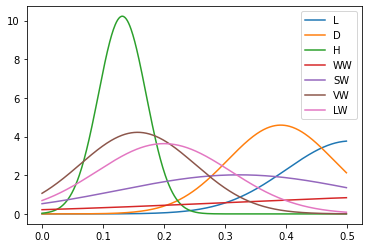

In [93]:
x = np.arange(0.0, 0.5, 0.001)

plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'L'), tmp._get_value("std", 'L')), label='L')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'D'), tmp._get_value("std", 'D')), label='D')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'H'), tmp._get_value("std", 'H')), label='H')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'WW'), tmp._get_value("std", 'WW')), label='WW')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'SW'), tmp._get_value("std", 'SW')), label='SW')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'VW'), tmp._get_value("std", 'VW')), label='VW')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'LW'), tmp._get_value("std", 'LW')), label='LW')


plt.legend()

In [94]:
data_M[col].corr()

,L,D,H,WW,SW,VW,LW
L,1.000000,0.983610,0.746355,0.934598,0.911976,0.909623,0.924398
D,0.983610,1.000000,0.750696,0.932879,0.907485,0.904899,0.928663
H,0.746355,0.750696,1.000000,0.757821,0.733973,0.741299,0.755670
WW,0.934598,0.932879,0.757821,1.000000,0.981556,0.969876,0.965296
SW,0.911976,0.907485,0.733973,0.981556,1.000000,0.938065,0.920389
VW,0.909623,0.904899,0.741299,0.969876,0.938065,1.000000,0.933944
LW,0.924398,0.928663,0.755670,0.965296,0.920389,0.933944,1.000000


In [95]:
data_M[col].corr().describe().loc[["min"]]

,L,D,H,WW,SW,VW,LW
min,0.746355,0.750696,0.733973,0.757821,0.733973,0.741299,0.75567


**Large-data dataset**

In [96]:
data_L = copy.deepcopy(data.loc[(data.R <= 15) & (data.R >= 11)])                                                   # & is a bitwise AND operator, whereas 'and' is a logical operator 
data_L

,R,S,L,D,H,WW,SW,VW,LW
0,15,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
10,14,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100
12,11,M,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.1900
15,12,M,0.500,0.400,0.130,0.6645,0.2580,0.1330,0.2400
20,11,M,0.355,0.280,0.095,0.2455,0.0955,0.0620,0.0750
...,...,...,...,...,...,...,...,...,...
4148,11,M,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.3550
4160,11,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000
4161,11,F,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845
4172,11,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490


In [97]:
tmp = data_L[col].describe().loc[["mean","std"]]
tmp

,L,D,H,WW,SW,VW,LW
mean,0.589545,0.463786,0.161454,1.106674,0.468113,0.242624,0.321548
std,0.085464,0.069827,0.029282,0.463021,0.226401,0.105617,0.121588


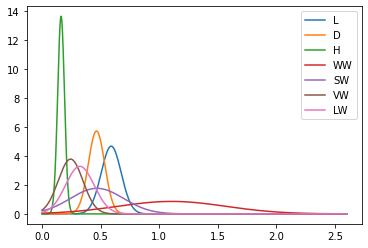

In [98]:
x = np.arange(0.0, 2.6, 0.001)

plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'L'), tmp._get_value("std", 'L')), label='L')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'D'), tmp._get_value("std", 'D')), label='D')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'H'), tmp._get_value("std", 'H')), label='H')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'WW'), tmp._get_value("std", 'WW')), label='WW')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'SW'), tmp._get_value("std", 'SW')), label='SW')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'VW'), tmp._get_value("std", 'VW')), label='VW')
plt.plot(x, norm.pdf(x, tmp._get_value("mean", 'LW'), tmp._get_value("std", 'LW')), label='LW')


plt.legend()

In [99]:
data_L[col].corr()

,L,D,H,WW,SW,VW,LW
L,1.000000,0.971832,0.784630,0.935477,0.901784,0.896240,0.888882
D,0.971832,1.000000,0.797463,0.928154,0.887991,0.881108,0.898311
H,0.784630,0.797463,1.000000,0.806313,0.745546,0.773979,0.811868
WW,0.935477,0.928154,0.806313,1.000000,0.961206,0.941564,0.927172
SW,0.901784,0.887991,0.745546,0.961206,1.000000,0.895374,0.842154
VW,0.896240,0.881108,0.773979,0.941564,0.895374,1.000000,0.845434
LW,0.888882,0.898311,0.811868,0.927172,0.842154,0.845434,1.000000


In [100]:
data_L[col].corr().describe().loc[["min"]]

,L,D,H,WW,SW,VW,LW
min,0.78463,0.797463,0.745546,0.806313,0.745546,0.773979,0.811868
